# Convolutional Neural Network

### Importing the libraries

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,         
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True 
)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',  
    target_size=(64, 64),    
    batch_size=32,           
    class_mode='binary'      
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [37]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',     
    target_size=(64, 64),    
    batch_size=32,           
    class_mode='binary'     
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [38]:
model = Sequential()

### Step 1 - Convolution

In [39]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

/Users/tanshushu/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [40]:
model.add(MaxPooling2D(pool_size = (2,2)))

### Adding a second convolutional layer

In [41]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [42]:
model.add(Flatten())

### Step 4 - Full Connection

In [43]:
model.add(Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [44]:
model.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [45]:
plot_model(model,show_shapes=True,show_layer_names=True)
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,644,609 (6.27 MB)

 Trainable params: 1,644,609 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN on the Training set and evaluating it on the Test set

In [46]:
hist = model.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25
)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

/Users/tanshushu/opt/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 562ms/step - accuracy: 0.5073 - loss: 0.7022 - val_accuracy: 0.6075 - val_loss: 0.6522
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 149s 596ms/step - accuracy: 0.6349 - loss: 0.6477 - val_accuracy: 0.6805 - val_loss: 0.6068
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 146s 582ms/step - accuracy: 0.6725 - loss: 0.6097 - val_accuracy: 0.7170 - val_loss: 0.5707
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 156s 621ms/step - accuracy: 0.7042 - loss: 0.5706 - val_accuracy: 0.7330 - val_loss: 0.5552
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 194s 590ms/step - accuracy: 0.7286 - loss: 0.5375 - val_accuracy: 0.7640 - val_loss: 0.5064
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 168s 669ms/step - accuracy: 0.7591 - loss: 0.4954 - val_accuracy: 0.7695 - val_loss: 0.4933
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 157s 625ms/step - accuracy: 0.7684 - loss: 0.4783 - val_accuracy: 0.7275 - val_loss: 0.5716
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 167s 666ms/step - accuracy: 0.7843 -

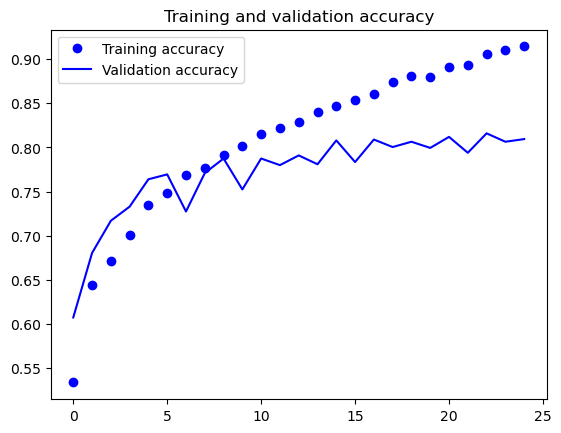

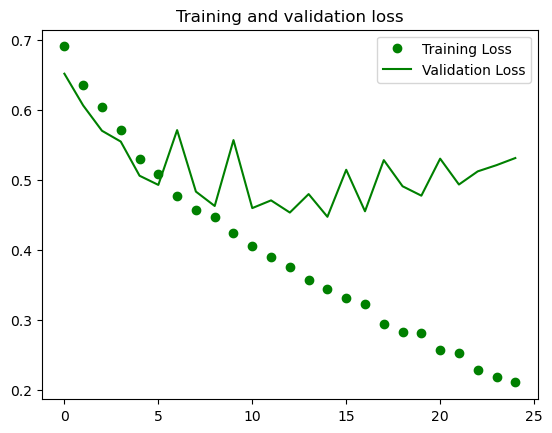

In [47]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Part 4 - Making a single prediction

In [49]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

image_paths = [
    'dataset/single_prediction/cat_or_dog_1.jpg',
    'dataset/single_prediction/cat_or_dog_2.jpg'
]

original_images = []
predictions = []

for img_path in image_paths:
   
    original_img = image.load_img(img_path, target_size=(64, 64))
    original_images.append(original_img)


    img_array = image.img_to_array(original_img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    
    result = model.predict(img_array)
    predictions.append(result[0][0]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


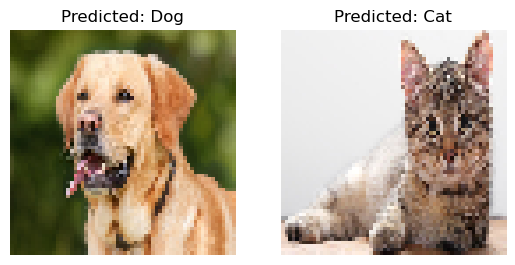

In [50]:
for i, (original_img, prediction) in enumerate(zip(original_images, predictions)):
    plt.subplot(1, len(original_images), i + 1)  
    plt.imshow(original_img)
    label = "Dog" if prediction > 0.5 else "Cat"
    plt.title(f"Predicted: {label}")
    plt.axis('off')

plt.show()